In [1]:
from __future__ import division
import numpy as np
import os
import ROOT
import math
import cmath
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'oscillation/' 

Welcome to JupyROOT 6.18/04


In [13]:
#!jupyter nbconvert --to script Oscillation.ipynb

[NbConvertApp] Converting notebook Oscillation.ipynb to script
[NbConvertApp] Writing 4727 bytes to Oscillation.py


In [2]:
try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(1)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

In [4]:
# define imaginary number not as j
z = 0 + 1j

In [5]:
# calculates e^... the time dependent propagation term
# needs i,j,;ength,energy, returns the value
def getEij(i,j,L,E):
    M=0
    if(i==1 and j ==2):
        M=-M21
    if(i==2 and j ==1):
        M=M21
    if(i==3 and j ==2):
        M=M32
    if(i==2 and j ==3):
        M=-M32
    if(i==1 and j ==3):
        M=-M32-M21
    if(i==3 and j ==1):
        M=M32+M21
    this = cmath.exp(-z*M*L/E*2.534)
    #if M==0:
    #    print 'Error!',i,j, this
    return this
    

In [6]:
# calculates probabilities for a to b oscillation
# needs a,b,length,energy,0/1 neutrino/antineutrino, returns probability
# careful: contains U matrix
def getProb(a,b,L,E,anti):
    P = 0
    U = [[math.cos(t1)*math.cos(t3),math.sin(t1)*math.cos(t3),math.sin(t3)*cmath.exp(-z*d)],\
        [-math.sin(t1)*math.cos(t2)-math.cos(t1)*math.sin(t2)*math.sin(t3)*cmath.exp(z*d),math.cos(t1)*math.cos(t2)-math.sin(t1)*math.sin(t2)*math.sin(t3)*cmath.exp(z*d),math.sin(t2)*math.cos(t3)],\
        [math.sin(t1)*math.sin(t2)-math.cos(t1)*math.cos(t2)*math.sin(t3)*cmath.exp(z*d),-math.cos(t1)*math.sin(t2)-math.sin(t1)*math.cos(t2)*math.sin(t3)*cmath.exp(z*d),math.cos(t2)*math.cos(t3)]]
    if anti == 1:
        U = np.conj(U)
    for i in range(3):
        for j in range(3):
            P+=U[a][i]*np.conj(U[a][j])*np.conj(U[b][i])*U[b][j]*getEij(i+1,j+1,L,E)
    return P.real

In [7]:
# generates three histograms with the probability for each flavour over length
# a= start composition, length, energy, neutrino/antoneutrino
def fillProbL(a,L,E,anti=0):
    n_bins = 1000
    h_e = ROOT.TH1F('h_e','h_e',n_bins,0,L)
    h_u = ROOT.TH1F('h_u','h_u',n_bins,0,L)
    h_t = ROOT.TH1F('h_t','h_t',n_bins,0,L)
    h_e.SetTitle('black=e, blue=mu, red=tau')
    h_e.SetLineColor(ROOT.kBlack)
    titel = 'Neutrino energy = '+str(E)+' GeV, Length [km]'
    h_e.SetXTitle(titel)
    h_e.SetYTitle('Probability')
    h_e.SetMinimum(0)
    h_e.SetMaximum(1)
    h_u.SetLineColor(ROOT.kBlue)
    h_t.SetLineColor(ROOT.kRed)
    for i in range(n_bins):
        h_e.SetBinContent(i,getProb(a,0,i*L/n_bins,E,anti))
        h_u.SetBinContent(i,getProb(a,1,i*L/n_bins,E,anti))
        h_t.SetBinContent(i,getProb(a,2,i*L/n_bins,E,anti))
    return h_e,h_u,h_t

# generates three histograms with the probability for each flavour over energy
# a= start composition, length, energy, neutrino/antoneutrino
def fillProbE(a,L,E,anti):
    n_bins = 1000
    h_e = ROOT.TH1F('h_e','h_e',n_bins,0,E)
    h_u = ROOT.TH1F('h_u','h_u',n_bins,0,E)
    h_t = ROOT.TH1F('h_t','h_t',n_bins,0,E)
    h_e.SetTitle('black=e, blue=mu, red=tau')
    h_e.SetLineColor(ROOT.kBlack)
    titel = 'Length = '+str(L)+' km, Energy [GeV]'
    h_e.SetXTitle(titel)
    h_e.SetYTitle('Probability')
    h_e.SetMinimum(0)
    h_e.SetMaximum(1)
    h_u.SetLineColor(ROOT.kBlue)
    h_t.SetLineColor(ROOT.kRed)
    for i in range(n_bins):
        h_e.SetBinContent(i,getProb(a,0,L,(i+1)*E/n_bins,anti))
        h_u.SetBinContent(i,getProb(a,1,L,(i+1)*E/n_bins,anti))
        h_t.SetBinContent(i,getProb(a,2,L,(i+1)*E/n_bins,anti))
    return h_e,h_u,h_t
    

# Here starts the interactive part!
Give oscillation parameters and generate histograms for the oscillation probabilities...

Warning in <TROOT::Append>: Replacing existing TH1: h_e (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_t (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/oscillation/Oscillation_length.png has been created


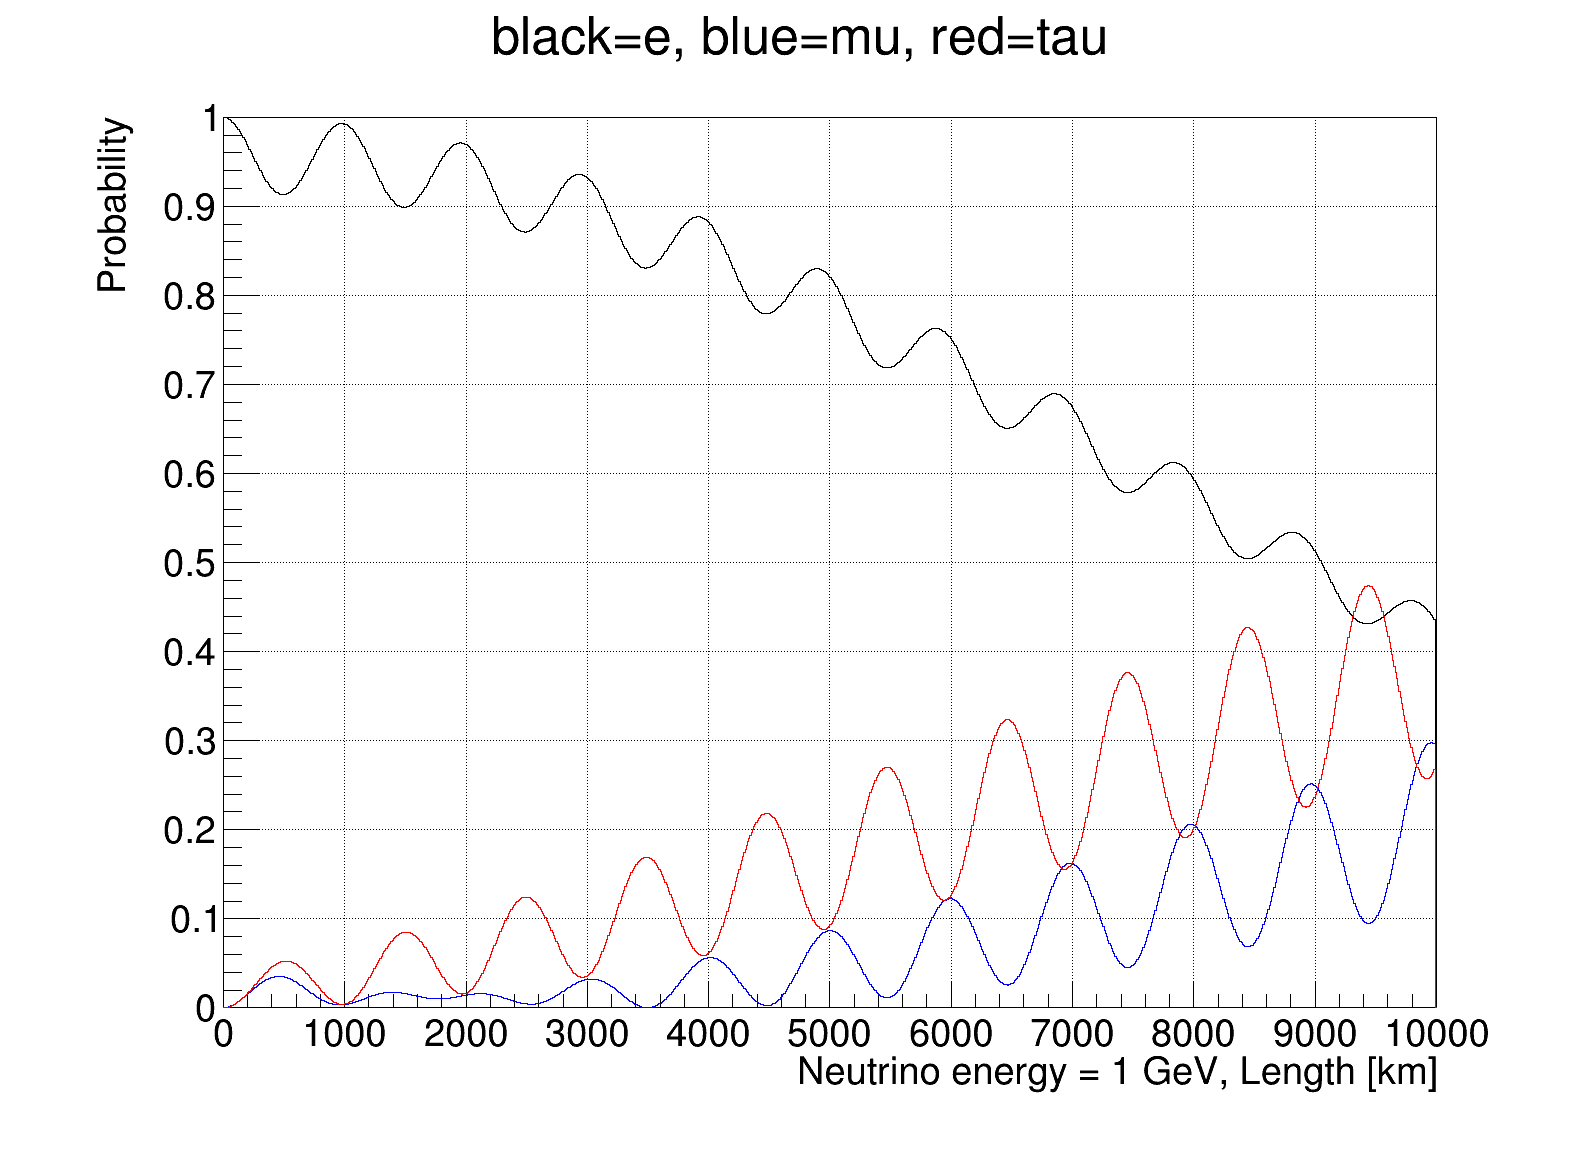

In [11]:
# define neutrino oscillation parameters
t1 = 33.6*2*cmath.pi/360 # t_12
t2 = 47.7*2*cmath.pi/360 # t_23
t3 = 8.49*2*cmath.pi/360 # t_13
M21 = 7.53e-5 # delta m21 mass difference squared
M32 = 2.457e-3 # delta m32 mass difference squared
d = cmath.pi/2 # delta CP phase

E = 1      # energy of neutrino in GeV
L = 10000  # maximal oscialltion length in km
a = fillProbL(0,L,E,0) # give [0-2]={e,u,t}, length, energy, [0,1]={neutrino,antineutrino}
h_e = a[0] # electron probability
h_u = a[1] # muon probability
h_t = a[2] # tau probability
h_e.Draw()
h_u.Draw('same')
h_t.Draw('same')
c1.Draw()
c1.SaveAs(outputdir+'Oscillation_length.png')

Warning in <TROOT::Append>: Replacing existing TH1: h_e (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_t (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/oscillation/Oscillation_energy.png has been created


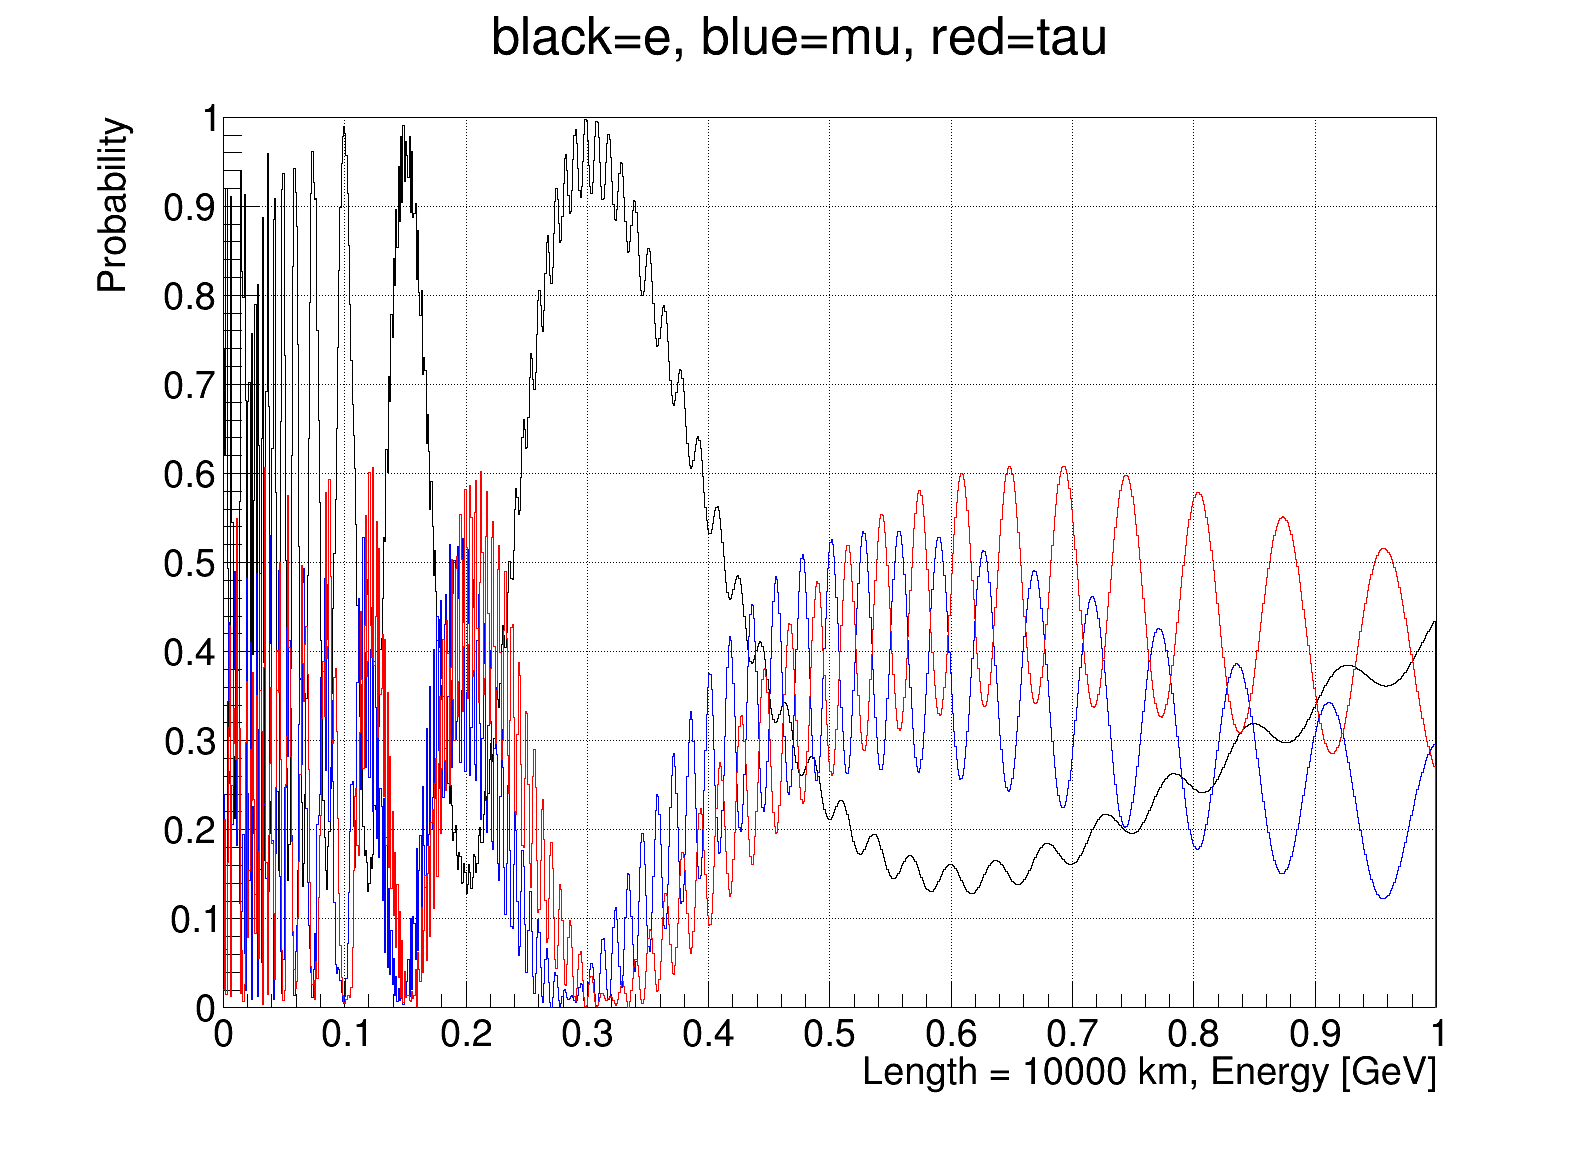

In [12]:
E = 1
L = 10000
a = fillProbE(0,L,E,0)
h_e = a[0]
h_u = a[1]
h_t = a[2]
h_e.Draw()
h_u.Draw('same')
h_t.Draw('same')
c1.Draw()
c1.SaveAs(outputdir+'Oscillation_energy.png')